## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [2]:
calls = pd.read_csv('/datasets/calls.csv',sep=',')
internet = pd.read_csv('/datasets/internet.csv',sep=',')
messages = pd.read_csv('/datasets/messages.csv',sep=',')
tariffs = pd.read_csv('/datasets/tariffs.csv',sep=',')
users = pd.read_csv('/datasets/users.csv',sep=',')

In [3]:
calls.head()
internet.head()
messages.head()
tariffs.head()
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [8]:
calls.tail()
internet.tail()
messages.tail()
tariffs.tail()
users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [9]:
calls.info()
internet.info()
messages.info()
tariffs.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 co

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Данные загружены верно, получена первая общая информация о датасете. 🚀
</div>

### Вывод

В целом информации достаточно, чтобы сделать по ней выводы. Но необходимо превести к хорошему виду.

## Подготовка данных

### Приведите данные к нужным типам

In [10]:
calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') #переводим к нужному датафрейму.
calls['duration'] = np.ceil(calls['duration']) #окгруляем в большую сторону
calls['month'] = pd.DatetimeIndex(calls['call_date']).month #добавляем столбец месяца

In [11]:
internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month #добавляем столбец месяца

In [12]:
messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') #переводим к нужному датафрейму.
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [13]:
users
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
#добавим информацию о тарифах в users в виде 0 и 1
def tariff_id(object):
    if object == 'smart':
        return 0
    elif object == 'ultra':
        return 1
users['tariff_id'] = users['tariff'].apply(tariff_id)

In [14]:
tariffs
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

### Посчитайте для каждого пользователя:

In [15]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
calls_data = calls.groupby(['user_id', 'month']).agg({'duration':'sum','id':'count'}).reset_index()

In [16]:
#количество отправленных сообщений по месяцам
internet_data = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_data['mb_used'] = internet_data['mb_used'] / 1024
internet_data['mb_used'] = np.ceil(internet_data['mb_used'])
internet_data['mb_used'] = internet_data['mb_used'].astype('int')

In [17]:
messages_data = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()

In [18]:
# объединяем таблицы
data_on = calls_data.merge(internet_data, on=['user_id', 'month'], how='outer')
data = data_on.merge(messages_data, on=['user_id', 'month'], how='outer')
data = data.merge(users, on=['user_id'], how='outer')
data = data.merge(tariffs, on=['tariff'],how='outer')

In [19]:
data.rename(columns={'id_x': 'calls', 'id_y': 'sms', 'mb_used': 'gb_used'}, inplace=True)

In [20]:
data.isnull().sum() #появились пропуски

user_id                     0
month                       2
duration                   42
calls                      42
gb_used                    13
sms                       499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
tariff_id                   0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [21]:
data = data.fillna(0) 

In [22]:
data.isnull().sum()

user_id                  0
month                    0
duration                 0
calls                    0
gb_used                  0
sms                      0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
tariff_id                0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [23]:
def function_minute(row):
    rev = row['rub_monthly_fee']
    if row['duration'] >= row['minutes_included']:
        rev += ((row['duration']-row['minutes_included'])*row['rub_per_minute'])
    if row['sms'] >= row['messages_included']:
        rev += ((row['sms'] - row['messages_included'])*row['rub_per_message'])
    if row['gb_used'] >= row['mb_per_month_included']/ 1024  :
        rev += ((row['gb_used'] - row['mb_per_month_included']/ 1024 )*row['rub_per_gb'])
    return rev
data['profit'] = data.apply(function_minute, axis = 1)

In [24]:
data.tail(10)

,user_id,month,duration,calls,gb_used,sms,age,churn_date,city,first_name,...,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
3206,1499,9.0,70.0,9.0,2.0,11.0,35,0,Пермь,Гектор,...,smart,0,50,15360,500,550,200,3,3,550.0
3207,1499,10.0,449.0,68.0,18.0,48.0,35,0,Пермь,Гектор,...,smart,0,50,15360,500,550,200,3,3,1150.0
3208,1499,11.0,612.0,74.0,18.0,59.0,35,0,Пермь,Гектор,...,smart,0,50,15360,500,550,200,3,3,1513.0
3209,1499,12.0,492.0,69.0,13.0,66.0,35,0,Пермь,Гектор,...,smart,0,50,15360,500,550,200,3,3,598.0
3210,1489,8.0,0.0,0.0,11.0,17.0,35,0,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,550.0
3211,1489,9.0,0.0,0.0,17.0,32.0,35,0,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,950.0
3212,1489,10.0,0.0,0.0,20.0,21.0,35,0,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,1550.0
3213,1489,11.0,0.0,0.0,18.0,20.0,35,0,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,1150.0
3214,1489,12.0,0.0,0.0,17.0,35.0,35,0,Санкт-Петербург,Павел,...,smart,0,50,15360,500,550,200,3,3,950.0
3215,1371,0.0,0.0,0.0,0.0,0.0,50,2018-12-30 00:00:00,Омск,Ириней,...,smart,0,50,15360,500,550,200,3,3,550.0


Вывод: 
Заполнили пропуски и обработали данные. Интересно, что есть пользователи которые не пользовались услугами...

## Проанализируйте данные


In [25]:
#создадим две таблицы по тарифам
smart = data[data['tariff_id'] == 0]
ultra = data[data['tariff_id'] == 1]

In [26]:
smart[['duration', 'sms', 'gb_used', 'profit', ]].describe()

,duration,sms,gb_used,profit
count,2230.000000,2230.000000,2230.000000,2230.000000
mean,417.747534,33.369058,16.321525,1289.641704
std,190.476754,28.230396,5.756167,818.370799
min,0.000000,0.000000,0.000000,550.000000
25%,282.000000,10.000000,13.000000,550.000000
50%,421.500000,28.000000,17.000000,1021.000000
75%,545.000000,51.000000,20.000000,1750.000000
max,1435.000000,143.000000,38.000000,6770.000000


In [27]:
ultra[['duration', 'sms', 'gb_used', 'profit', ]].describe()

,duration,sms,gb_used,profit
count,986.000000,986.000000,986.000000,986.000000
mean,526.089249,49.313387,19.474645,2070.030426
std,317.887549,47.806040,9.868057,376.015578
min,0.000000,0.000000,0.000000,1950.000000
25%,282.500000,6.000000,12.000000,1950.000000
50%,518.000000,38.000000,19.000000,1950.000000
75%,751.750000,78.750000,27.000000,1950.000000
max,1673.000000,224.000000,49.000000,4800.000000


In [28]:
print('smart, средние показатели за месяц:')
print('')
print('Минуты:', smart['duration'].describe()['mean'])
print('SMS:', smart['sms'].describe()['mean'])
print('Gb:', smart['gb_used'].describe()['mean'])

smart, средние показатели за месяц:

Минуты: 417.747533632287
SMS: 33.36905829596412
Gb: 16.32152466367713


In [29]:
print('ultra, средние показатели за месяц:')
print('')
print('Минуты:', ultra['duration'].describe()['mean'])
print('SMS:', ultra['sms'].describe()['mean'])
print('Gb:', ultra['gb_used'].describe()['mean'])

ultra, средние показатели за месяц:

Минуты: 526.0892494929006
SMS: 49.31338742393509
Gb: 19.474645030425965


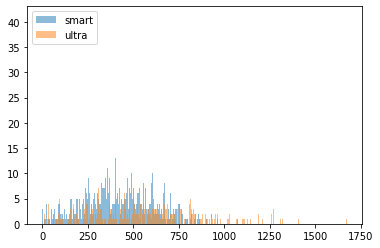

In [30]:
plt.hist(smart['duration'], bins=1000, alpha = 0.5, label='smart')
plt.hist(ultra['duration'], bins=1000, alpha = 0.5, label='ultra')
plt.legend(loc='upper left')

plt.show()

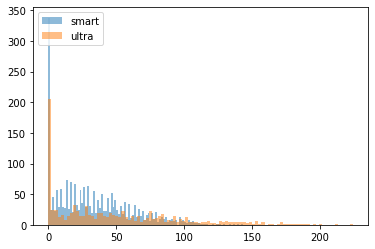

In [31]:
plt.hist(smart['sms'], bins=100, alpha = 0.5, label='smart')
plt.hist(ultra['sms'], bins=100, alpha = 0.5, label='ultra')
plt.legend(loc='upper left')

plt.show()

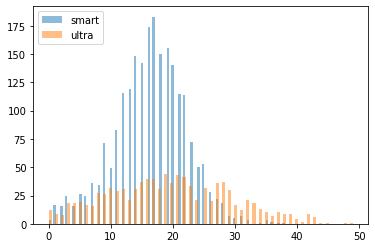

In [32]:
plt.hist(smart['gb_used'], bins=100, alpha = 0.5, label='smart')
plt.hist(ultra['gb_used'], bins=100, alpha = 0.5, label='ultra')
plt.legend(loc='upper left')

plt.show()

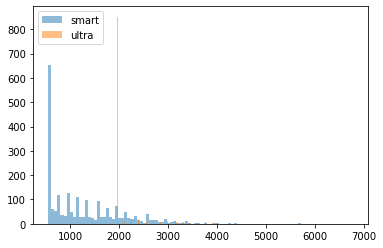

In [33]:
plt.hist(smart['profit'], bins=100, alpha = 0.5, label='smart')
plt.hist(ultra['profit'], bins=100, alpha = 0.5, label='ultra')
plt.legend(loc='upper left')

plt.show()

Вывод:

Интересная картина получается, что люди на тарифе смарт часто выходят за рамки своего лимита и часто даже платят больше чем на тарифе ултра.

## Проверьте гипотезы

### Гипотеза (средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются)

Нулевой гипотезой будет гипотеза о том, что средние наших выборок равны. Альтернативной гипотезой будет- cредняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

In [34]:
from scipy import stats as st

alpha = .05 #Критический уровень значимости

results = st.ttest_ind(smart['profit'], ultra['profit'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Было отвержено, что выборки одиннаковые,а уровень критической значимости очень мал. Следтсвие альтернативная гипотеза не отвергается. 

### Гипотеза (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.)

Нулевой гипотезой будет, что средняя выручка пользователей из Москвы равна другим регионам. Альтернативная - средняя выручка Москвы и регионов отличаются. Для проверки гипотезы создадим две таблицы moscow и other. 

In [35]:
moscow = data[data['city'] == 'Москва']
other = data[data['city'] != 'Москва']

alpha = .05
results = st.ttest_ind(moscow['profit'], other['profit'])
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


p-value = 0.54, значит есть большая вероятность того, что отличие средних значений наших выборок случайно и мы не можем отвергнуть нулевую гипотезу, которая говорит нам о равенстве средних значений,альтернативную гипотезу о различии средних мы отвергаем.

## Общий вывод

При анализе обоих тарифов, я пришел к выводу, что примерное потребление трафика, минут и смс равно, но из-за высокой стоимости тарифа ултра в целом он более выгоден для компании, но это поверхностно. Думаю если более детально разбирать, возможно картина измениться т.к. кол-во смс и минут клиента 'ultra' тратят заметно больше.